In [17]:
import os
from pytorchyolo import detect, models, utils
from PIL import Image
import io
import numpy as np

In [6]:
yolo = models.load_model(
    r"yolo_torch/PyTorch-YOLOv3/config/yolov3.cfg",
    r"yolo_torch/yolov3.weights"
)

In [10]:
import requests


def get_img_from_bytes(byte_array: bytes):
    image = Image.open(io.BytesIO(byte_array))
    image = image.convert("RGB")
    return image


def get_img_from_url(url: str):
    image_data = requests.get(url).content
    return get_img_from_bytes(image_data)

In [65]:
# url = "https://www.princeton.edu/sites/default/files/styles/half_2x/public/images/2022/02/KOA_Nassau_2697x1517.jpg?itok=iQEwihUn"
# url = "https://www.kxan.com/wp-content/uploads/sites/40/2022/05/2.jpg"
url = "https://www.vmcdn.ca/f/files/shared/miscellaneous-stock-images/dog-walking-adobestock_92983456.jpeg;w=960;h=640;bgcolor=000000"
img = get_img_from_url(url)
img = np.asarray(img)

In [66]:
boxes = detect.detect_image(yolo, img)

In [67]:
boxes

array([[359.29367  ,  99.894875 , 597.6975   , 578.07153  ,   0.9948152,
         16.       ],
       [591.4558   , 352.8888   , 762.9932   , 613.641    ,   0.9760157,
         16.       ]], dtype=float32)

478.17667 238.40384
Rectangle(xy=(359.294, 99.8949), width=238.404, height=478.177, angle=0)


Text(359.29367, 99.894875, '16')

<Figure size 432x288 with 0 Axes>

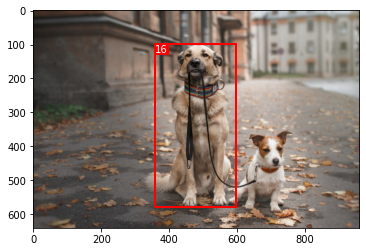

In [70]:
from matplotlib import patches
import matplotlib.pyplot as plt
from pytorchyolo.utils.utils import load_classes, rescale_boxes, non_max_suppression, print_environment_info
import random

img_size = 300

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(img)
# Rescale boxes to original image
# boxes = rescale_boxes(boxes, img_size, img.shape[:2])
unique_labels = np.unique(detections[:, -1])
n_cls_preds = len(unique_labels)
# Bounding-box colors
cmap = plt.get_cmap("tab20b")
colors = [cmap(i) for i in np.linspace(0, 1, n_cls_preds)]
bbox_colors = random.sample(colors, n_cls_preds)


x1 = boxes[0][0]
x2 = boxes[0][2]

y1 = boxes[0][1]
y2 = boxes[0][3]

cls_pred = boxes[0][-1]


box_w = x2 - x1
box_h = y2 - y1

print(box_h, box_w)

# Create a Rectangle patch
bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none")
# Add the bbox to the plot
ax.add_patch(bbox)
print(bbox)
# Add label
plt.text(
    x1,
    y1,
    s=int(cls_pred),
    color="white",
    verticalalignment="top",
    bbox={"color": "red", "pad": 0}
)

# Save generated image with detections